In [1]:
import tensorflow as tf

In [2]:
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(precision=4)

In [3]:
flowers_root = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)
flowers_root = pathlib.Path(flowers_root)

228827136/228813984 [==============================] - 7s 0us/step


In [4]:
flowers_root

PosixPath('/home/ahmed/.keras/datasets/flower_photos')

In [5]:
for item in flowers_root.glob("*"):
  print(item.name)

dandelion
sunflowers
LICENSE.txt
tulips
daisy
roses


In [6]:
list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

In [7]:
for f in list_ds.take(5):
  print(f.numpy())

b'/home/ahmed/.keras/datasets/flower_photos/daisy/9345273630_af3550031d.jpg'
b'/home/ahmed/.keras/datasets/flower_photos/tulips/14094114202_4c1d7f1116.jpg'
b'/home/ahmed/.keras/datasets/flower_photos/sunflowers/5223643767_d8beb7e410.jpg'
b'/home/ahmed/.keras/datasets/flower_photos/daisy/15327813273_06cdf42210.jpg'
b'/home/ahmed/.keras/datasets/flower_photos/tulips/13531001134_72052100e1_m.jpg'


In [8]:
def process_path(file_path):
  label = tf.strings.split(file_path, os.sep)[-2]
  return tf.io.read_file(file_path), label

labeled_ds = list_ds.map(process_path)

In [9]:
labeled_ds

<MapDataset shapes: ((), ()), types: (tf.string, tf.string)>

In [10]:
for image_raw, label_text in labeled_ds.take(1):
  print(repr(image_raw.numpy()[:100]))
  print()
  print(label_text.numpy())

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x02\x02\x03\x02\x02\x02\x02\x02\x04\x03\x03\x02\x03\x05\x04\x05\x05\x05\x04\x04\x04\x05\x06\x07\x06\x05\x05\x07\x06\x04\x04\x06\t\x06\x07\x08\x08\x08\x08\x08\x05\x06\t\n\t\x08\n\x07\x08\x08\x08\xff\xdb\x00C\x01\x01\x01\x01\x02\x02\x02'

b'roses'


In [23]:
inc_dataset = tf.data.Dataset.range(105)
dec_dataset = tf.data.Dataset.range(0, -105, -1)
dataset = tf.data.Dataset.zip((inc_dataset, dec_dataset))
batched_dataset = dataset.batch(4)
print(batched_dataset.element_spec)
for batch in batched_dataset.take(110):
  print([arr.numpy() for arr in batch])

(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))
[array([0, 1, 2, 3]), array([ 0, -1, -2, -3])]
[array([4, 5, 6, 7]), array([-4, -5, -6, -7])]
[array([ 8,  9, 10, 11]), array([ -8,  -9, -10, -11])]
[array([12, 13, 14, 15]), array([-12, -13, -14, -15])]
[array([16, 17, 18, 19]), array([-16, -17, -18, -19])]
[array([20, 21, 22, 23]), array([-20, -21, -22, -23])]
[array([24, 25, 26, 27]), array([-24, -25, -26, -27])]
[array([28, 29, 30, 31]), array([-28, -29, -30, -31])]
[array([32, 33, 34, 35]), array([-32, -33, -34, -35])]
[array([36, 37, 38, 39]), array([-36, -37, -38, -39])]
[array([40, 41, 42, 43]), array([-40, -41, -42, -43])]
[array([44, 45, 46, 47]), array([-44, -45, -46, -47])]
[array([48, 49, 50, 51]), array([-48, -49, -50, -51])]
[array([52, 53, 54, 55]), array([-52, -53, -54, -55])]
[array([56, 57, 58, 59]), array([-56, -57, -58, -59])]
[array([60, 61, 62, 63]), array([-60, -61, -62, -63])]
[array([64, 65, 66, 67]), a

In [25]:
df = pd.read_csv("/home/ahmed/work/atopiWork/atopiCodes/preprocessing/patientNumber_imName_DegradationRate.csv")

In [29]:
df

,Unnamed: 0,patientNumber,imagePath,degradationRate
0,0,357290,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,5
1,1,976845,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,3
2,2,1012164,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,3
3,3,768041,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,3
4,4,909121,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1
...,...,...,...,...
1346,1346,529589,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,4
1347,1347,935352,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,2
1348,1348,476072,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1
1349,1349,212879,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,2


In [50]:
def parse_image(filename, label):
  #parts = tf.strings.split(filename, os.sep)
  #label = parts[-2]

  image = tf.io.read_file(filename)
  image = tf.io.decode_jpeg(image)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, [64, 64])
  return image, label

In [33]:
list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

In [34]:
file_path = next(iter(list_ds))
image, label = parse_image(file_path)

In [42]:
image.shape

TensorShape([128, 128, 3])

In [43]:
label

<tf.Tensor: shape=(), dtype=string, numpy=b'sunflowers'>

In [44]:
imFilePaths = df["imagePath"].to_numpy()

In [45]:
imFileLabels = df["degradationRate"].to_numpy()

In [46]:
dataset = tf.data.Dataset.from_tensor_slices((imFilePaths, imFileLabels))

In [47]:
dataset

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int64)>

In [51]:
dataset = dataset.map(parse_image, num_parallel_calls=4)

In [52]:
dataset

<ParallelMapDataset shapes: ((64, 64, None), ()), types: (tf.float32, tf.int64)>

In [54]:
image, label = next(iter(dataset))

In [55]:
image.shape

TensorShape([64, 64, 3])

In [56]:
label

<tf.Tensor: shape=(), dtype=int64, numpy=5>

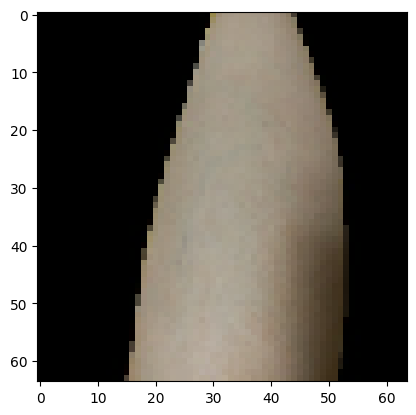

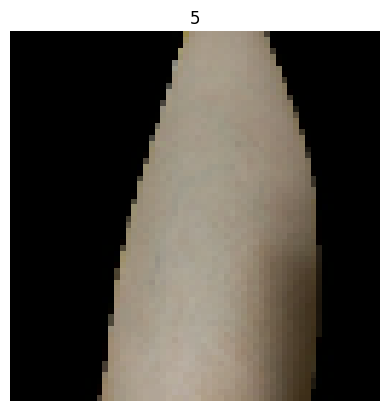

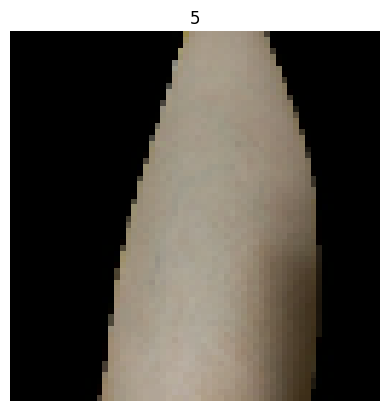

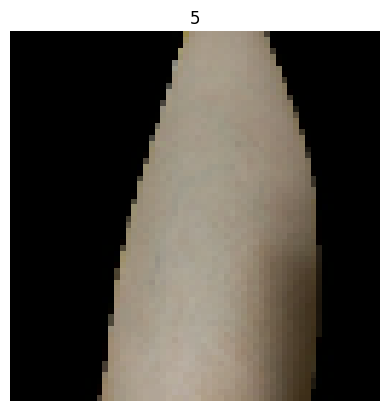

In [60]:
def show(image, label):
  plt.figure()
  plt.imshow(image)
  plt.title(label.numpy())
  plt.axis('off')
  plt.show()  

show(image, label)